<img style="float:right;width:100px" src="https://enib.fr/images/logo-enib-accueil.jpg">
<div><h3>Labo de méthodes numériques S6O, printemps 2020</h3>
       <p><em>Nom Prénom</em></p>
</div>
<div style="text-align:center;padding-bottom:20px;padding-top:10px">
    <h1> TP 1 : introduction à la résolution d'équations et systèmes différentiels </h1>
</div>
    

In [1]:
#Evite d'utiliser show :
%matplotlib inline 
#les bons modules :
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

import scipy.optimize as opt

In [2]:
# nos fonctions :

def euler(f,yinit,tps):
    n=len(tps);
    l=len(yinit);
    y=np.zeros((n,l));
    y[0,:]=yinit;
    for i in range(n-1):
        #print(i);
        h=tps[i+1]-tps[i];
        y[i+1,:]=y[i,:]+h*f(y[i,:],tps[i]);
    return y

def euler_imp(f,yinit,tps):
    n=len(tps);
    l=len(yinit);
    y=np.zeros((n,l));
    y[0,:]=yinit;
    for i in range(n-1):
        #print(i);
        h=tps[i+1]-tps[i];
        def g(X):
            return y[i,:]+h*f(X,tps[i+1])-X
        y[i+1,:]=opt.broyden1(g,y[i,:]);
    return y

def RK2(f,yinit,tps):
    n=len(tps);
    l=len(yinit);
    y=np.zeros((n,l));
    y[0,:]=yinit;
    for i in range(n-1):
        #print(i);
        h=tps[i+1]-tps[i];
        A=y[i,:];
        B=y[i,:]+h/2*f(A,tps[i]);
        y[i+1,:]=y[i,:]+h*f(B,tps[i]+h/2);
    return y

def RK4(f,yinit,tps):
    n=len(tps);
    l=len(yinit);
    y=np.zeros((n,l));
    y[0,:]=yinit;
    for i in range(n-1):
        #print(i);
        h=tps[i+1]-tps[i];
        A=y[i,:];
        B=y[i,:]+h/2*f(A,tps[i]);
        C=y[i,:]+h/2*f(B,tps[i]+h/2);
        D=y[i,:]+h*f(C,tps[i]+h);
        y[i+1,:]=y[i,:]+h/6*(f(A,tps[i])+2*f(B,tps[i]+h/2)+2*f(C,tps[i]+h/2)+f(D,tps[i]+h));
    return y

# Exercice 1 : résolution d'une équation différentielle

On souhaite résoudre le problème de Cauchy 
\begin{equation}
\left\{
\begin{array}{l}
y'(t)-2\displaystyle\frac{y(t)}{t}=-t^2y^2(t),~t\in[1;5]\\
y(1)=5
\end{array}
\right.
\qquad (1)
\end{equation}

### Question 1 

Donner la solution exacte de ce problème, après en avoir montré l'unicité.


### Question 2 

Utiliser la commande "odeint", pour tracer la courbe (approchée numériquement) $\{(t,y(t)),~t\in[1,5]\}$ : on tracera la courbe pour  $h=0.2$ et $h=0.01$. 

t1= [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10. ]
t1.shape= (46,)
len(t1)= 46
t2.shape= (901,)
yode1.shape= (46, 1)
yode2.shape= (901, 1)


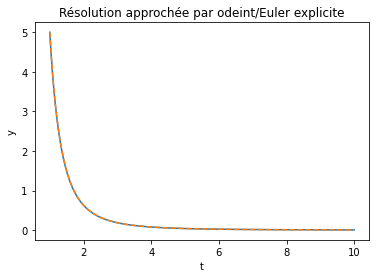

In [3]:
y0=[5];

h1=0.2;
h2=0.01;
t1=np.arange(1,10+h1,h1);
t2=np.arange(1,10+h2,h2);
print("t1=",t1);
print("t1.shape=",t1.shape);
print("len(t1)=",len(t1));
print("t2.shape=",t2.shape);

#test=np.zeros((len(t1),));
#print("test=",test);
#test2=np.zeros(t1.shape);
#print("test2=",test2);

def cauchy(y,t):
    ydot=-t*t*y*y+2*y/t;
    return ydot

yode1=odeint(cauchy,y0,t1);
yode2=odeint(cauchy,y0,t2);
yeuler2=euler(cauchy,y0,t2);
yeuler_imp2=euler_imp(cauchy,y0,t2);
yRK2_2=RK2(cauchy,y0,t2);
yRK4_2=RK4(cauchy,y0,t2);

print("yode1.shape=",yode1.shape);
print("yode2.shape=",yode2.shape);

plt.plot(t2,yode2);
#plt.plot(t2,yRK4_2,'--');
#plt.plot(t2,yRK2_2,'--');
#plt.plot(t2,yeuler2,'--');
plt.plot(t2,yeuler_imp2,'--');
#plt.plot(t1,yode1,':s');
plt.xlabel("t");
plt.ylabel("y");
#plt.title("Résolution approchée par odeint/Euler explicite");
#plt.legend(["h2="+str(h2)+", odeint","h2="+str(h2)+", RK4","h2="+str(h2)+", RK2","h2="+str(h2)+", Euler exp."]);#,"h1="+str(h1)+", odeint"]);

### Question 3   

Que vaut la solution approchée en $t=1.8$ pour un pas $h=0.2$ ?



In [4]:
index1=int((1.8-t1[0])/h1);
print("index1=",index1);
print("t1[index1]=",t1[index1]);
print("yode1[index1]=",yode1[index1]);

index2=int((1.8-t2[0])/h2);
print("index2=",index2);
print("t2[index2]=",t2[index2]);
print("yode2[index2]=",yode2[index2]);

index1= 4
t1[index1]= 1.7999999999999998
yode1[index1]= [0.85733882]
index2= 80
t2[index2]= 1.8000000000000007
yode2[index2]= [0.85733882]


### Question 4
Tracer également et pour les mêmes discrétisations la courbe de la solution exacte.

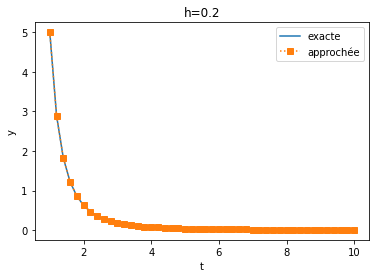

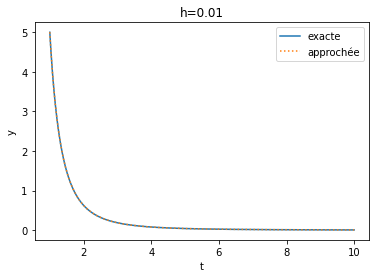

In [5]:
def exacte(t):
    return 5/(t**3)

z1=exacte(t1);
z2=exacte(t2);

plt.plot(t1,z1);
plt.plot(t1,yode1,':s');
plt.xlabel("t");
plt.ylabel("y");
plt.title("h=0.2");
plt.legend(["exacte","approchée"]);

plt.figure();
plt.plot(t2,z2);
plt.plot(t2,yode2,':');
plt.xlabel("t");
plt.ylabel("y");
plt.title("h=0.01");
plt.legend(["exacte","approchée"]);

### Question 5

Tracer la courbe de l'erreur (en log sur l'axe des ordonnées)

(46,)
(901,)


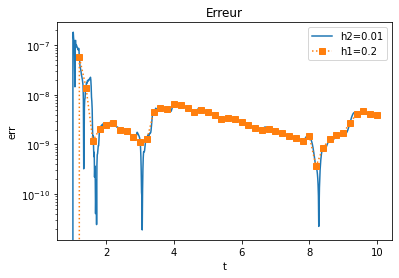

In [6]:
#flatten
err1=np.array(yode1).flatten()-z1;
print(err1.shape);
err2=np.array(yode2).flatten()-z2;
print(err2.shape);
plt.semilogy(t2,np.abs(err2));
plt.semilogy(t1,np.abs(err1),':s');
plt.xlabel("t");
plt.ylabel("err");
plt.title("Erreur");
plt.legend(["h2=0.01","h1=0.2"]);

### Question 6

Tracer les champs de vecteurs associés au problème (1).

tchp.shape = (50, 40)
ychp.shape = (50, 40)


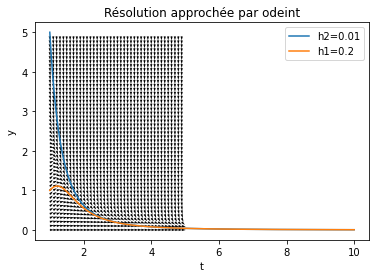

In [7]:
tchp,ychp=np.meshgrid(np.arange(1,5,0.1),np.arange(0,5,0.1));
print("tchp.shape =",tchp.shape);
print("ychp.shape =",ychp.shape);
ftchp=np.ones(tchp.shape);
fychp=2*ychp/tchp-tchp*tchp*ychp*ychp;
ftchp_norm=ftchp/np.sqrt(ftchp**2+fychp**2);
fychp_norm=fychp/np.sqrt(ftchp**2+fychp**2);

plt.quiver(tchp,ychp,ftchp_norm,fychp_norm);
plt.plot(t2,yode2,'-');

y0bis=1;
yode2bis=odeint(cauchy,y0bis,t2);
plt.plot(t2,yode2bis,'-');
plt.xlabel("t");
plt.ylabel("y");
plt.title("Résolution approchée par odeint");
plt.legend(["h2=0.01","h1=0.2"]);

# Exercice 2 : résolution d'un système différentiel 

En 1925 et 1926, Alfred James Volta et Vito Volterra ont, indépendamment l'un de l'autre, proposé un modèle d'équations décrivant les évolutions conjointes d'une population de proies (initialement des lièvres) et de celle de leurs prédateurs (initialement des proies). Ces équations s'écrivent 
$$
\left\{
\begin{array}{rcl}
x'(t)&=&x(t)(\alpha-\beta y(t))\\
y'(t)&=&-y(t)(\delta-\gamma x(t))
\end{array}
\right.
$$
où $x(t)$ est l'effectif des proies au temps $t$, et $y(t)$ celui des prédateurs. 
### Question 1 

Expliquez en commentaire à quels phénomènes naturels correspondent selon vous les paramètres $\alpha,\beta,\gamma,\delta$.



 On pose à présent tous les paramètres ci-dessus égaux à 1. On initialise également les populations à $1/2$ (il s'agit plus donc ici d'une proportion de chaque espèce dans la population totale).

### Question 2

Définir la fonction associée à la résolution du système différentiel.


In [8]:
alpha,beta,delta,gamma=np.array([1,1,1,1]);

def cauchy2(z,t):
    x=z[0];
    y=z[1];
    xdot=x*(alpha-beta*y);
    ydot=-y*(delta-gamma*x);
    zdot=np.array([xdot,ydot]);
    return zdot

def cauchy2bis(z,t):
    return np.array([z[0]*(alpha-beta*z[1]),-z[1]*(delta-gamma*z[0])])

### Question 3

Tracer les champs de vecteurs-vitesses sur le maillage $[0,4]\times[0,4]$ avec un pas de $0.2$.

xchp2.shape = (23, 23)


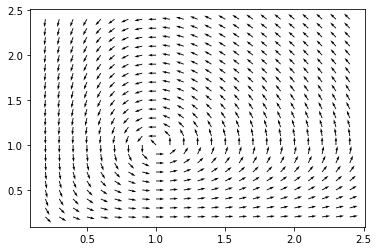

In [9]:
xchp2,ychp2=np.meshgrid(np.arange(0.2,2.5,0.1),np.arange(0.2,2.5,0.1));
print("xchp2.shape =",xchp2.shape);
#xdot=x*(alpha-beta*y); # pour rappel Pb de Cauchy
#ydot=-y*(delta-gamma*x);
fxchp2=xchp2*(alpha-beta*ychp2);
fychp2=-ychp2*(delta-gamma*xchp2);
fxchp_norm2=fxchp2/np.sqrt(fxchp2**2+fychp2**2);
fychp_norm2=fychp2/np.sqrt(fxchp2**2+fychp2**2);

plt.quiver(xchp2,ychp2,fxchp_norm2,fychp_norm2);

### Question 4 

Appliquer la méthode "integrate.odeint" sur l'intervalle de temps $[0,100]$, avec un pas de $0.01$, puis afficher, sur le même graphique que le champ de vecteurs, et en rouge, la courbe estimée de $(x(t),y(t)),~t\in[0,100]$.

tt.shape = (10001,)
zode.shape = (10001, 2)


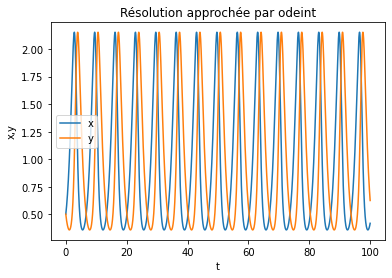

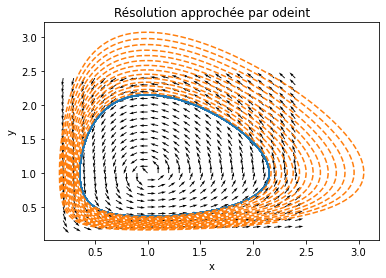

In [10]:
z0=np.array([1/2,1/2]);

hh=0.01;
tt=np.arange(0,100+hh,hh);
print("tt.shape =",tt.shape);

zode=odeint(cauchy2bis,z0,tt);
zeuler=euler(cauchy2bis,z0,tt);

print("zode.shape =",zode.shape);

plt.plot(tt,zode[:,0]);
plt.plot(tt,zode[:,1]);
#plt.plot(tt,zeuler[:,0],'--');
#plt.plot(tt,zeuler[:,1],'--');
plt.xlabel("t");
plt.ylabel("x,y");
plt.title("Résolution approchée par odeint");
plt.legend(["x","y"]);

plt.figure();
plt.quiver(xchp2,ychp2,fxchp_norm2,fychp_norm2);
plt.plot(zode[:,0],zode[:,1]);
plt.plot(zeuler[:,0],zeuler[:,1],'--');
plt.xlabel("x");
plt.ylabel("y");
plt.title("Résolution approchée par odeint");

## Question 5 

Faire varier les paramètres $\alpha, \beta,\gamma,\delta$ au moyen de la commande "interact", dont un exemple d'utilisation est donné ci-dessous :

In [11]:
#p=1

y0=10
x=np.arange(0,5,0.001)

def show(l):
    p=l
    def fun(u,t):
        z=-p*u
        return z
    y = odeint(fun,y0,x)
    plt.plot(x,y,label="courbe 1",color="orange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    
interact(show,l=(-10,10,1))


interactive(children=(IntSlider(value=0, description='l', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.show(l)>

In [12]:
def show(alpha,beta,delta,gamma):
    def cauchy2bis(z,t):
        return np.array([z[0]*(alpha-beta*z[1]),-z[1]*(delta-gamma*z[0])])
    zode=odeint(cauchy2bis,z0,tt);
    plt.figure();
    plt.plot(zode[:,0],zode[:,1]);
    plt.xlabel("x");
    plt.ylabel("y");
    plt.title("Résolution approchée par odeint");
    
interact(show,alpha=(0.4,1.7,0.2),beta=(0.4,1.7,0.2),delta=(0.4,1.7,0.2),gamma=(0.4,1.7,0.2));

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.7, min=0.4, step=0.2), FloatSlider(val…

# Exercice 3 : résolution d'une équation d'ordre > 1

On considère ici l'équation du pendule pesant, assortie de conditions initiales :

\begin{equation}
\left\{
\begin{array}{l}
y''(t)+\sin(y(t))=0\\
y(0)=0,~y'(0)=1
\end{array}
\right.
\qquad (2)
\end{equation}

### Question 1 

Ramener cette équation à un problème de Cauchy, en écrivant le code de la fonction associée

In [13]:
def cauchy3(Y,t):
    return np.array([Y[1],-np.sin(Y[0])])

### Question 2

Utiliser la commande "integrate.odeint" pour tracer sur le même graphe et pour $t\in[0,6\pi]$ les courbes $(t,y(t))$ et $(t,y'(t))$, et sur un autre graphe la courbe $(y(t),y'(t))$. On choisira un pas de taille $\simeq 2\pi/n$ et on fera varier $n$ pour constater la précision, au moyen d'"interact".

In [2]:
z30=np.array([0,1]);

def show3(nn):
    h3=2*np.pi/nn;
    t3=np.arange(0,6*np.pi+h3,h3);
    z3ode=odeint(cauchy3,z30,t3);
    plt.plot(z3ode[:,0],z3ode[:,1]);
    plt.xlabel("y");
    plt.ylabel("yp");
    plt.title("Résolution approchée par odeint");
    
interact(show3,nn=(10,1000,50));

NameError: name 'np' is not defined